In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Visualization function for better representation of matrix values
def plot_matrix_with_values(matrix, title='Matrix'):
    plt.figure(figsize=(6, 6))
    plt.imshow(matrix, cmap='Blues', interpolation='nearest')
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            plt.text(j, i, f'{matrix[i, j]:.1f}', ha='center', va='center', color='red', fontsize=8)
    plt.title(title)
    plt.colorbar()
    plt.show()

In [23]:
# ReLU Activation
def relu(x: np.ndarray) -> np.ndarray:
    """
    Applies the ReLU activation function to a given input matrix.
    Task:
    - Replace all negative values in the input matrix with 0.
    """
    return np.maximum(x, 0)

# Convolutional Layer
class Convolutional:
    """
    Represents a convolutional layer with optional padding and stride.

    Attributes:
    - name (str): The name of the layer (e.g., 'conv1').
    - kernel (np.ndarray): The filter to convolve with.
    - stride (int): Step size for sliding the kernel.
    - padding (int): Padding to apply around the input.

    Methods:
    - forward(input): Computes the convolution operation on the input matrix.
    """
    def __init__(self, name: str, kernel: np.ndarray, stride: int = 1, padding: int = 0):
        """
        Initializes the convolutional layer.
        Task:
        - Store the parameters (name, kernel, stride, padding).
        """
        self.name = name
        self.kernel = kernel
        self.stride = stride
        self.padding = padding

    def forward(self, input: np.ndarray) -> np.ndarray:
        """
        Computes the forward pass of the convolution operation.
        Task:
        - Add padding to the input (if required).
        - Slide the kernel across the input matrix with the given stride.
        - Compute the sum of element-wise products at each step.
        - Return the resulting feature map.
        """
        width_feature_map = (input.shape[0] - self.kernel.shape[0] + 2 * self.padding) // self.stride + 1
        height_feature_map = (input.shape[1] - self.kernel.shape[1] + 2 * self.padding) // self.stride + 1
        feature_map = np.zeros((width_feature_map, height_feature_map))
        if self.padding > 0:
            input = np.pad(input, self.padding)
        for i in range(0, input.shape[0] - self.kernel.shape[0] + 1, self.stride):
            for j in range(0, input.shape[1] - self.kernel.shape[1] + 1, self.stride):
                feature_map[i, j] = np.sum(input[i:i+self.kernel.shape[0], j:j+self.kernel.shape[1]] * self.kernel)
        return feature_map
    
    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)
    
class Polling:
    def __init__(self, name: str, pool_size: int, stride: int):
        """
        Initializes the max pooling layer.
        Task:
        - Store the parameters (name, pool_size, stride).
        """
        self.name = name
        self.pool_size = pool_size
        self.stride = stride

    def forward(self, input: np.ndarray) -> np.ndarray:
        """
        Computes the forward pass of the max pooling operation.
        Task:
        - Slide the pooling window across the input matrix with the given stride.
        - Select the maximum value within each window.
        - Return the resulting downsampled feature map.
        """
        width_feature_map = (input.shape[0] - self.pool_size) // self.stride + 1
        height_feature_map = (input.shape[1] - self.pool_size) // self.stride + 1
        feature_map = np.zeros((width_feature_map, height_feature_map))
        for i in range(0, input.shape[0] - self.pool_size + 1, self.stride):
            for j in range(0, input.shape[1] - self.pool_size + 1, self.stride):
                feature_map[i // self.stride, j // self.stride] = self.operation(input[i:i+self.pool_size, j:j+self.pool_size])
        return feature_map
    
    def operation(self, input: np.ndarray) -> np.ndarray:
        pass
    
    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)

# Max Pooling Layer
class MaxPoolingLayer(Polling):
    def operation(self, input: np.ndarray) -> np.ndarray:
        return np.max(input)
    

# Average Pooling Layer
class AveragePoolingLayer(Polling):
    def operation(self, input: np.ndarray) -> np.ndarray:
        return np.mean(input)

# Residual Block
class ResidualBlock:
    """
    Represents a residual block that implements skip connections.

    Attributes:
    - name (str): The name of the block (e.g., 'residual1').

    Methods:
    - forward(input, residual): Adds the input and residual matrices element-wise and applies ReLU activation.
    """
    def __init__(self, name: str, kernel: np.ndarray):
        """
        Initializes the residual block.
        Task:
        - Store the name of the block.
        """
        self.name = name
        self.conv1 = Convolutional(f'{name}_conv1', kernel, 1, 1)
        self.max_pooling = MaxPoolingLayer(f'{name}_pooling', 3, 2)
        self.avg_pooling = AveragePoolingLayer(f'{name}_pooling', 2, 1)

    def forward(self, input: np.ndarray) -> np.ndarray:
        """
        Computes the forward pass of the residual block.
        Task:
        - Add the input matrix and the residual matrix element-wise.
        - Apply the ReLU activation function to the result.
        - Return the resulting matrix.
        """
        out_conv1 = self.conv1(input)
        out_relu = relu(out_conv1)
        out_residual = input + out_relu
        out_max_pooling = self.max_pooling(out_residual)
        out_avg_pooling = self.avg_pooling(out_max_pooling)
        return out_relu, out_residual, out_max_pooling, out_avg_pooling

    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)
        

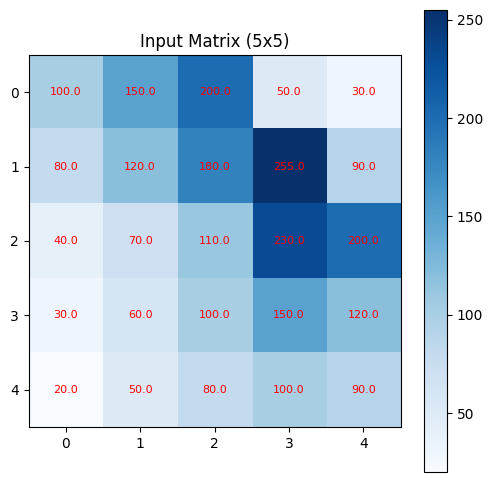

In [24]:
# Step 0: Define the Input Matrix
# Use this fixed 5x5 input matrix for all your calculations to ensure consistent results.
test_input = np.array([[100, 150, 200, 50, 30],
                       [80, 120, 180, 255, 90],
                       [40, 70, 110, 230, 200],
                       [30, 60, 100, 150, 120],
                       [20, 50, 80, 100, 90]])
plot_matrix_with_values(test_input, "Input Matrix (5x5)")

# Step 1: Convolution
# Fixed 3x3 Convolutional Filter (Kernel) to be used
conv_filter = np.array([[0.1, -0.2, 0.1],
                        [-0.3, 0.4, 0.1],
                        [0.2, -0.5, 0.1]])


In [25]:
residual = ResidualBlock('residual1', conv_filter)
out_relu, out_residual, out_max_pooling, out_avg_pooling = residual(test_input)

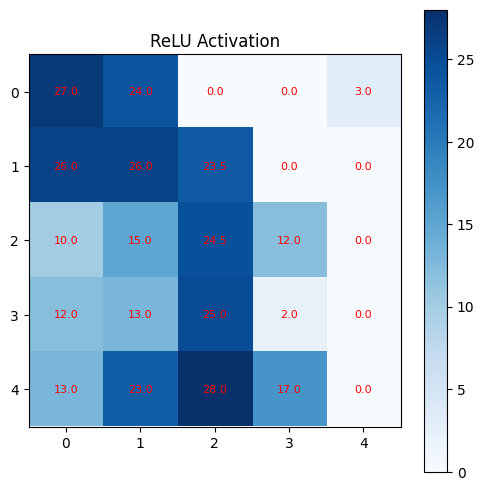

In [26]:
plot_matrix_with_values(out_relu, "ReLU Activation")

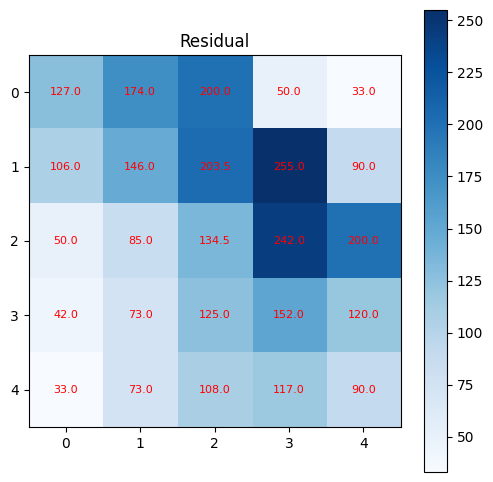

In [27]:
plot_matrix_with_values(out_residual, "Residual")

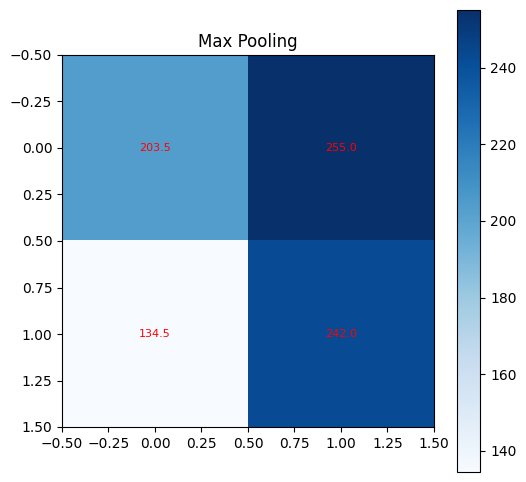

In [28]:
plot_matrix_with_values(out_max_pooling, "Max Pooling")

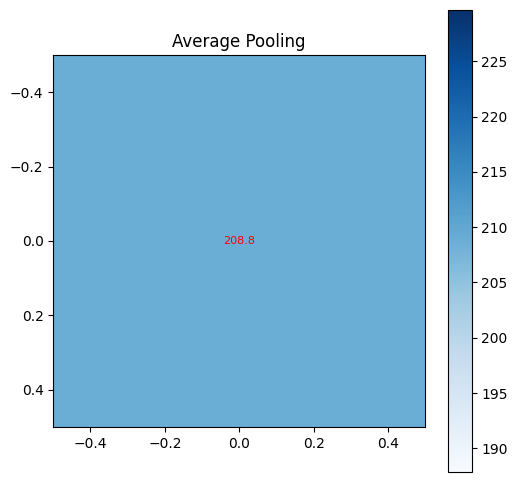

In [29]:
plot_matrix_with_values(out_avg_pooling, "Average Pooling")

## Solution

You are tasked with implementing a simplified forward pass of a convolutional neural network (CNN) that includes a residual block. The steps include performing a convolution operation with the given filter, applying the ReLU function to the convolution output, adding a skip connection (residual addition) with the original input, performing 2×2 max pooling, and finally applying global average pooling to obtain a single scalar value. The resulting images at each step are provided to allow you to compare your outputs with the expected results.

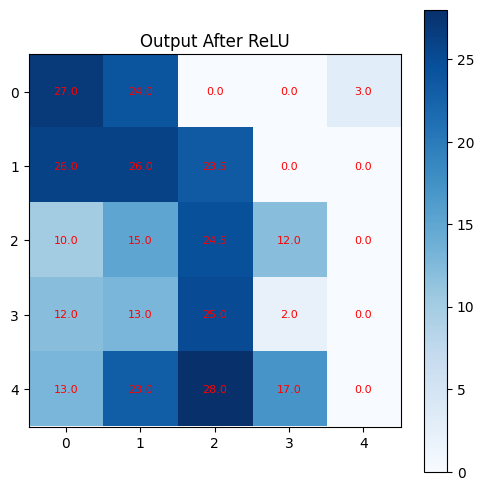

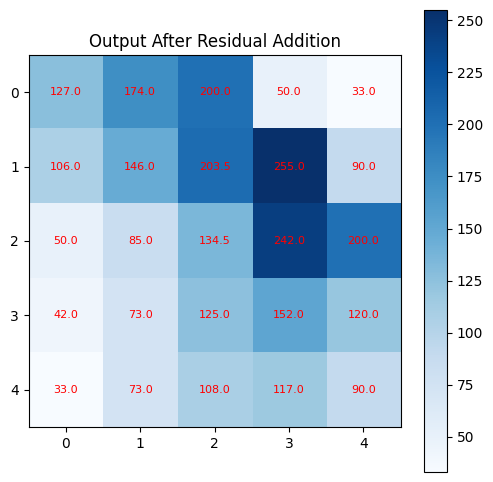

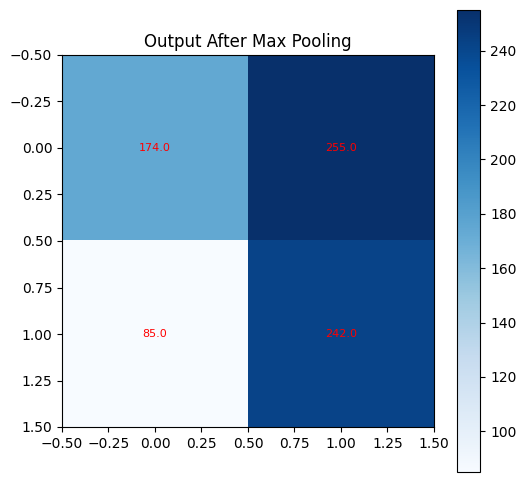

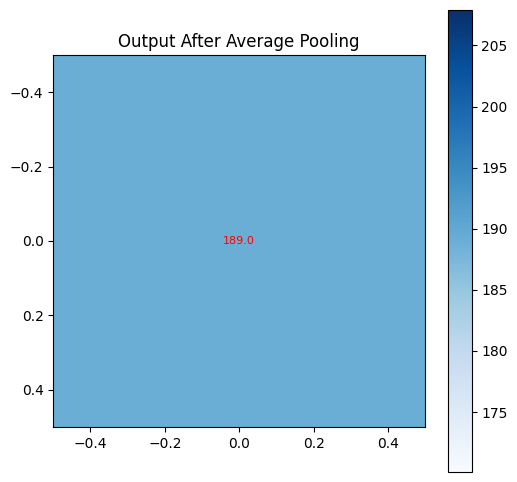